In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/Spam_Dataset/spam.csv')
data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# **Data Cleaning**

In [ ]:
#add the spam column in the dataset, whose value is 1 if the text is categorized as spam.
data['Spam']=data['Category'].apply(lambda x:1 if x=='spam' else 0)
data.head(5)

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [ ]:
# Change the column name from 'Message' to 'text'
data.rename(columns={'Message': 'text'}, inplace=True)
data

,Category,text,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will ü b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [ ]:
#count the NULL values of each column
data.isna().sum()

Category    0
text        0
Spam        0
dtype: int64

In [ ]:
data['length'] = data['text'].apply(len)

In [ ]:
#Shows the duplicated values or rows
data.duplicated().sum()

415

In [ ]:
#keeping only the first instance of a value
data = data.drop_duplicates(keep='first')
data.shape

(5157, 4)

In [ ]:
data.duplicated().sum()

0

# **EDA (Exploratory Data Analysis)**

In [ ]:
#count the values of spam and ham(non-spam text)
data['Spam'].value_counts()

Spam
0    4516
1     641
Name: count, dtype: int64

Text(0.5, 1.0, 'Number of Spam and Ham')

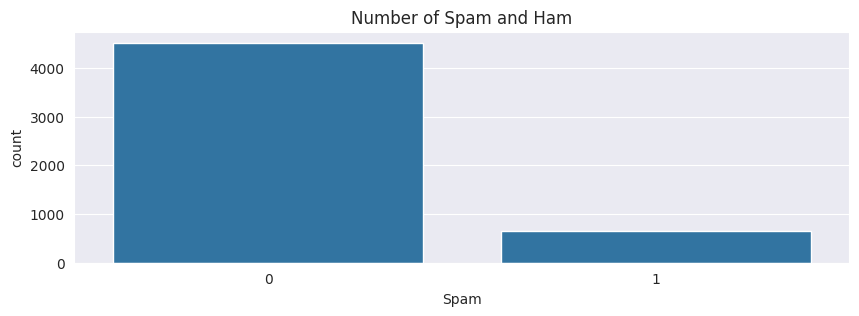

In [ ]:
# plot for count of spam and ham in data
plt.figure(figsize=(10,3))
sns.set_style('darkgrid')
sns.countplot(x='Spam',data=data)
plt.title('Number of Spam and Ham')

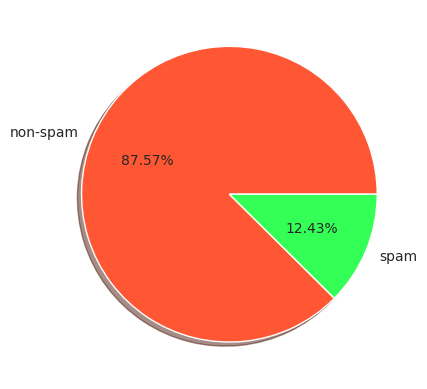

In [ ]:
#visualizing the percentages using pi chart
colors = ['#FF5733', '#33FF57']
plt.pie(data['Spam'].value_counts(), labels=['non-spam','spam'],autopct="%0.2f%%",colors=colors,
    shadow=True )
plt.show()

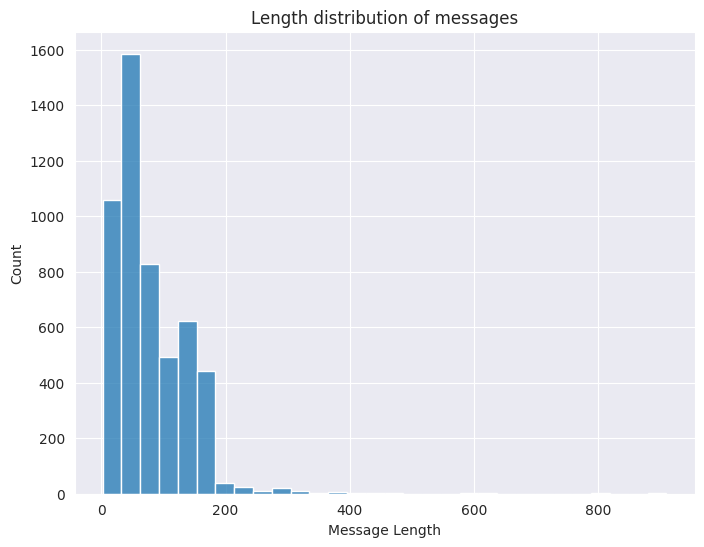

In [ ]:
plt.figure(figsize=(8, 6))
sns.histplot(data['length'], bins=30)
plt.title('Length distribution of messages')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.show()

array([<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>],
      dtype=object)

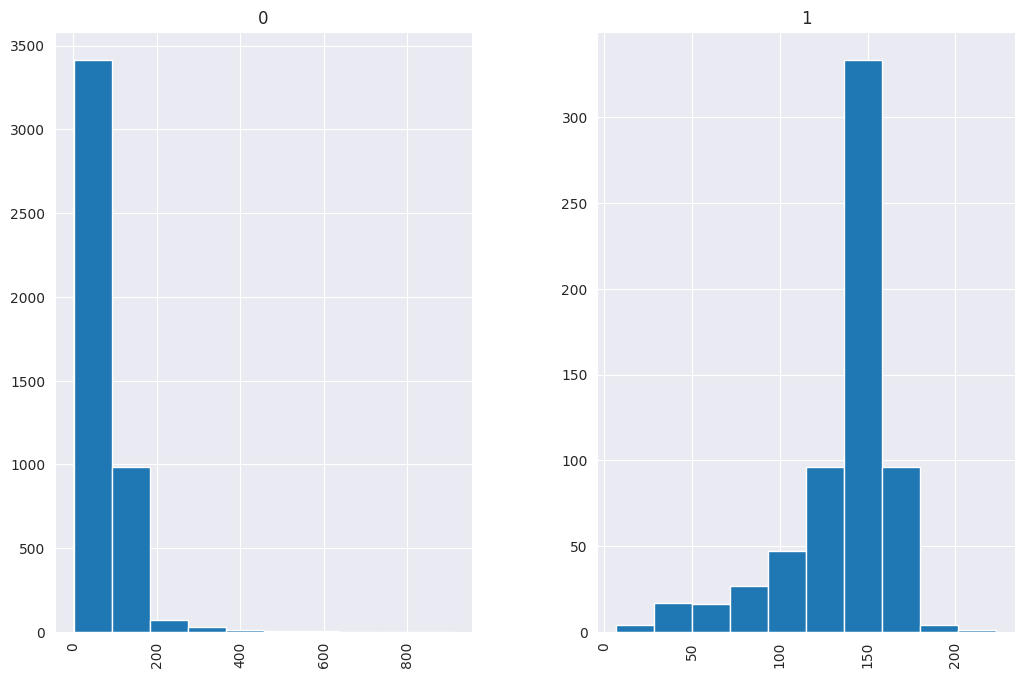

In [ ]:
data.hist(column='length',by='Spam',figsize=(12,8))

# **Data Preprocessing or Feature Engineering**

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
# Convert text to lowercase
data['text'] = data['text'].str.lower()

<ipython-input-16-50da7b2c873d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['text'] = data['text'].str.lower()


#### Tokenization and removing punctuation

In [ ]:
data['tokenized_text'] = data['text'].apply(lambda x: re.sub(r'\W', ' ', x))


<ipython-input-17-c015cc9f974e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenized_text'] = data['text'].apply(lambda x: re.sub(r'\W', ' ', x))


In [ ]:
data

,Category,text,Spam,length,tokenized_text
0,ham,"go until jurong point, crazy.. available only ...",0,111,go until jurong point crazy available only ...
1,ham,ok lar... joking wif u oni...,0,29,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...,0,49,u dun say so early hor u c already then say
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives aro...
...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,160,this is the 2nd time we have tried 2 contact u...
5568,ham,will ü b going to esplanade fr home?,0,36,will ü b going to esplanade fr home
5569,ham,"pity, * was in mood for that. so...any other s...",0,57,pity was in mood for that so any other s...
5570,ham,the guy did some bitching but i acted like i'd...,0,125,the guy did some bitching but i acted like i d...


In [ ]:
# Download NLTK resources
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Remove stopwords

In [ ]:

stop_words = set(stopwords.words('english'))
data['cleaned_text'] = data['tokenized_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


<ipython-input-20-406d0267c5a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['tokenized_text'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))


In [ ]:
data

,Category,text,Spam,length,tokenized_text,cleaned_text
0,ham,"go until jurong point, crazy.. available only ...",0,111,go until jurong point crazy available only ...,go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,0,29,ok lar joking wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,1,155,free entry in 2 a wkly comp to win fa cup fina...,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,u dun say so early hor... u c already then say...,0,49,u dun say so early hor u c already then say,u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...",0,61,nah i don t think he goes to usf he lives aro...,nah think goes usf lives around though
...,...,...,...,...,...,...
5567,spam,this is the 2nd time we have tried 2 contact u...,1,160,this is the 2nd time we have tried 2 contact u...,2nd time tried 2 contact u u 750 pound prize 2...
5568,ham,will ü b going to esplanade fr home?,0,36,will ü b going to esplanade fr home,ü b going esplanade fr home
5569,ham,"pity, * was in mood for that. so...any other s...",0,57,pity was in mood for that so any other s...,pity mood suggestions
5570,ham,the guy did some bitching but i acted like i'd...,0,125,the guy did some bitching but i acted like i d...,guy bitching acted like interested buying some...


#### TF-IDF Vectorization

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features = 3000)

In [ ]:
X = tfidf.fit_transform(data['cleaned_text']).toarray()
y = data['Spam'].values

In [ ]:
X.shape

(5157, 3000)

In [ ]:
y.shape

(5157,)

# ***Train Test Split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size = 0.20, random_state = 2)

# ***Handling Imbalance Dataset***

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


# **Model Training**

#### Importing Models 1. Naive Baye's, 2. SVM 3. Decision Tree

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC

from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_resampled, y_train_resampled)


MultinomialNB()

In [ ]:
# Train Support Vector Machines classifier
svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_resampled, y_train_resampled)


SVC(kernel='linear')

In [ ]:
# Train Decision Trees classifier
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier()

#### Performance/Accuracy of the models

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
# Predictions
naivebayes_pred = nb_classifier.predict(X_test)
svm_pred = svm_classifier.predict(X_test)
decisiontree_pred = dt_classifier.predict(X_test)

# Model evaluation
print("Naive Bayes Accuracy:", accuracy_score(y_test, naivebayes_pred))
print("Naive Bayes Classification Report:")
print(classification_report(y_test, naivebayes_pred))

print("Support Vector Machines Accuracy:", accuracy_score(y_test, svm_pred))
print("Support Vector Machines Classification Report:")
print(classification_report(y_test, svm_pred))

print("Decision Trees Accuracy:", accuracy_score(y_test, decisiontree_pred))
print("Decision Trees Classification Report:")
print(classification_report(y_test, decisiontree_pred))

Naive Bayes Accuracy: 0.9622093023255814
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98       905
           1       0.79      0.94      0.86       127

    accuracy                           0.96      1032
   macro avg       0.89      0.95      0.92      1032
weighted avg       0.97      0.96      0.96      1032

Support Vector Machines Accuracy: 0.9835271317829457
Support Vector Machines Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       905
           1       0.97      0.90      0.93       127

    accuracy                           0.98      1032
   macro avg       0.98      0.95      0.96      1032
weighted avg       0.98      0.98      0.98      1032

Decision Trees Accuracy: 0.9573643410852714
Decision Trees Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97